In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

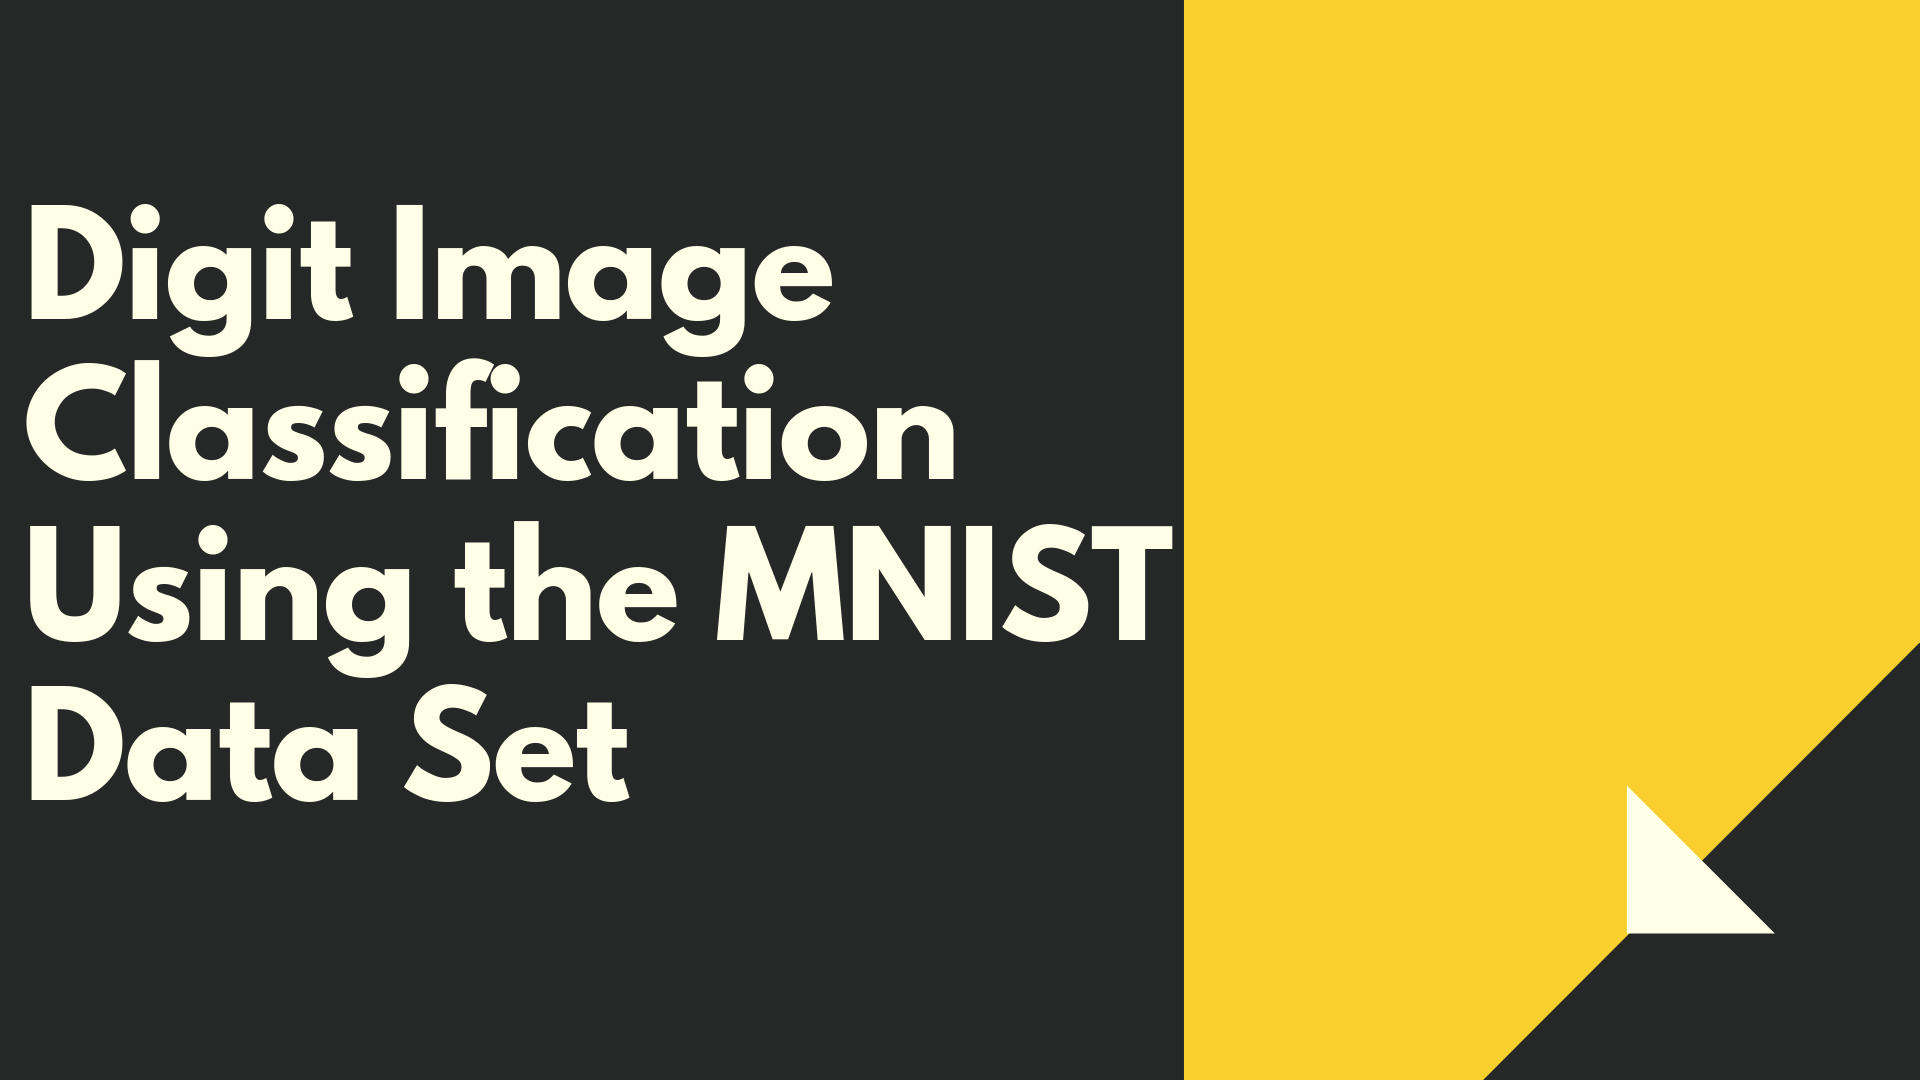

**The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#Reading the DATA
train = pd.read_csv('../input/digit-recognizer/train.csv')
test= pd.read_csv('../input/digit-recognizer/test.csv')

My traning data for digit recognition

In [ ]:
train.head()

In [ ]:
train.columns

In [ ]:
#Shape of data Train and Test
train.shape,test.shape

In [ ]:
sns.countplot(x=train.label ,data=train)

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Okay! In our training data we have label, Now i  will seperate it into X and y variables:

In [ ]:
X = train.drop('label',axis=1)
y = train['label']

In [ ]:
#Now we will convert the labels intoOne-Hot representation:
y=pd.get_dummies(y)

In [ ]:
print(y.iloc[:10:])

Here I've scale the data inton 0 and 1.

In [ ]:
X=X/255.0
test=test/255.0

In [ ]:
#Reshaping the data for further model process
X = X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [ ]:
#Shape of X,y and Test data
print(X.shape)
print(y.shape)
print(test.shape)

->Now i will apply train_test_split for spliting the training data into training and testing.

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
#Setting up the batch_size and epochs
batch_size=32
epochs=20

# Neural Network with using tensorflow Keras

# What are neural networks?

***Neural networks reflect the behavior of the human brain, allowing computer programs to recognize patterns and solve common problems in the fields of AI, machine learning, and deep learning.***

Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.

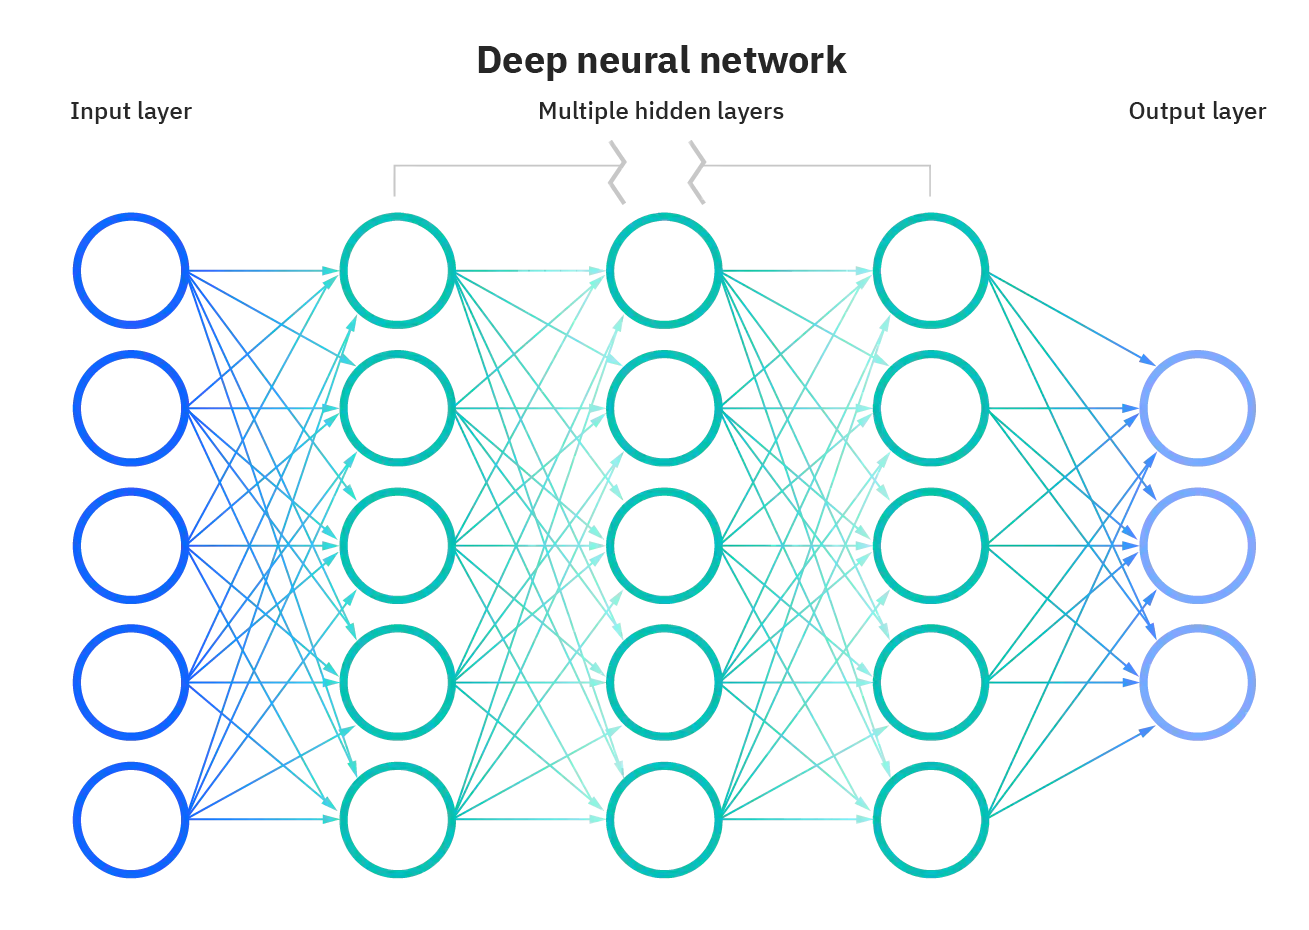

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=(28,28,1)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(units=100, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.optimizer.lr=0.001

In [ ]:
#Early stopping
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=True)

In [ ]:
rlrp=ReduceLROnPlateau(monitor='val_loss', patience=3,factor=0.5, min_lr=0.00001)

In [ ]:
history_model = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=2,
    callbacks=[early_stopping,rlrp]
)

Here we can see that the model converges at around 0.96 val_accuracy score (different results may occur at each run, due to the randomization of the initial parameters).

Let's also take a look at the loss and accuracy values at each epoch. However, since we will do the same for each model in the notebook, we will first create a helper function for it.

In [ ]:
#Let's plot the curve for loss,val_loss,accuracy,val_accuracy
def plot_loss_nd_accuracy(history):
    history_df=pd.DataFrame(history)
    history_df.loc[0:,['loss','val_loss']].plot()
    history_df.loc[0:,['accuracy','val_accuracy']].plot()

In [ ]:
plot_loss_nd_accuracy(history_model.history)

# Buliding a Convolutional Neural Network (CNN) using Keras
A convolutional neural network (CNN) is a type of artificial neural network used in image recognition and processing that is specifically designed to process pixel data.

CNNs are used for image classification and recognition because of its high accuracy. ... The CNN follows a hierarchical model which works on building a network, like a funnel, and finally gives out a fully-connected layer where all the neurons are connected to each other and the output is processed.

# The Model
I am using a convolutional neural network with the following architecture:

1)InputLayer(28, 28, 1)

2)Preprocessing

3)Conv2D(kernel_size=3, filters=32, activation='relu')

4)BatchNormalization

5)Conv2D(kernel_size=3, filters=64, activation='relu')

6)BatchNormalization

7)Conv2D(kernel_size=5, filters=128, activation='relu')

8)BatchNormalization

9)Conv2D(kernel_size=5, filters=128, activation='relu')

10)MaxPool2D

11)BatchNormalization

12)Flatten

13Dense(units=1024,activation='relu')

14)Dense(units=10, activation='softmax'

In [ ]:
# Building the model
model_cnn = keras.Sequential([
    layers.InputLayer(input_shape=[28,28,1]),
    preprocessing.RandomContrast(0.2),
    preprocessing.RandomTranslation(height_factor=0.1,width_factor=0.1),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.BatchNormalization(axis=1),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.BatchNormalization(axis=1),
    layers.Conv2D(filters=128, kernel_size=5, activation='relu'),
    layers.BatchNormalization(axis=1),
    layers.Conv2D(filters=128, kernel_size=5, activation='relu'),
    layers.MaxPool2D(),
    layers.BatchNormalization(axis=1),
    layers.Flatten(),
    layers.Dense(units=1024,activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

In [ ]:
model_cnn.summary()

In [ ]:
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_cnn.optimizer.lr=0.001

Fitting the same data to cnn

In [ ]:
model_2 = model_cnn.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=2,
    callbacks=[early_stopping,rlrp]
)

In [ ]:
plot_loss_nd_accuracy(model_2.history)

We can see that the validation and training data seem to converge together this time, which implies that we have solved the main causes of overfitting.

In [ ]:
predictions = model_cnn.predict(test)
results = predictions.argmax(axis=-1)

# Submission

In [ ]:
result = pd.DataFrame()
result['ImageId'] = list(range(1,28001))
result['Label'] = results
result.to_csv("CNN_MODEL.csv", index = False) 